In [1]:
import numpy as np
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from utils.experiments import *
from config import FIGURE_DIR_BDCM as FIGURE_DIR
from config import TABLE_DIR

## Results for the HPR algorithm, generated with `histories-automated.py`

In [2]:
res = []
for p in Path(f'results/hpr-experiments-20251103').glob('*'): # clean-experiments-V4 is our original data
    try:
        a = load_pickle(p)
        res.append(a)
    except Exception as e:
        print(f'Could not load {p}: {e}')



Could not load results/hpr-experiments-20251103/5_3_10000_4683.pkl: Ran out of input
Could not load results/hpr-experiments-20251103/5_3_10000_23691.pkl: Ran out of input
Could not load results/hpr-experiments-20251103/4_3_10000_2676.pkl: Ran out of input
Could not load results/hpr-experiments-20251103/6_3_10000_1874.pkl: Ran out of input


In [5]:
df = pd.DataFrame(res)
df.initial_mag = df.initial_mag.apply(lambda x: np.array(x))
df.final_mag = df.final_mag.apply(lambda x: np.array(x))
df.random_init_mag = df.random_init_mag.apply(lambda x: np.array(x))

In [6]:
df.trajectories = df.trajectories.apply(lambda x: np.array(x))
df['first_consensus'] = df.trajectories.apply(lambda x: np.where((x==1.0).sum(axis=-1)==0,-1,np.argmax(x == 1.0,axis=-1))) # first occurence of consensus

In [7]:
results_init_mag = []
equlilb_frac= 0.5

for (n, d, T), g in df.groupby(['n', 'd', 'T']):
    best_init = np.inf
    for i, row in g.iterrows():
        equilib_T =int(len(row.first_consensus) * equlilb_frac)
        mask = row.first_consensus[equilib_T:] == T
        initial_mags = row.initial_mag[equilib_T:][mask]
        if len(initial_mags) == 0:
            continue
        best_init = min(initial_mags.min(), best_init)
        results_init_mag.append({
            'n': n,
            'd': d,
            'T': T,
            'best_init_mag': best_init
        })
df_results_init_mag = pd.DataFrame(results_init_mag)
df_results_init_mag_og = df_results_init_mag.copy()
df_results_init_mag = df_results_init_mag.groupby(['n', 'd', 'T'])[['best_init_mag']].mean()

    
for n, g in df_results_init_mag.groupby('n'):
    r = g.reset_index().pivot(index='d',columns='T',values='best_init_mag')
    print(r)
    print()

T       1         2     3
d                        
3   0.372  0.208000  0.12
4   0.264  0.090000  0.00
5   0.282  0.080000  0.00
6   0.236  0.051111 -0.04
7   0.240  0.060000   NaN
8   0.220  0.024000   NaN
9   0.220  0.022000   NaN
10  0.200  0.022000   NaN
11  0.186  0.020000   NaN
12  0.180  0.002000   NaN
13  0.180  0.020000   NaN
14  0.172  0.000000   NaN

T          1         2         3
d                               
3   0.384000  0.207200  0.120000
4   0.262200  0.084600 -0.003111
5   0.277800  0.089200 -0.005400
6   0.229200  0.048800 -0.036000
7   0.242800  0.109333       NaN
8   0.214600  0.028400       NaN
9   0.216600  0.036000       NaN
10  0.200333  0.017000       NaN
11  0.196000  0.017000       NaN
12  0.184750  0.016600       NaN
13  0.187111  0.018000       NaN
14  0.174000  0.009300       NaN

T         1         2         3
d                              
3  0.384111  0.210067  0.122060
4  0.263920  0.086920 -0.004220
5  0.278920  0.091460 -0.005183
6  0.231520 

In [8]:
results_init_mag = []
equlilb_frac = 0.5

for (n, d, T), g in df.groupby(['n', 'd', 'T']):
    best_init = np.inf
    avg_best_init = 0
    items = 0
    avg_init = 0
    for i, row in list(g.iterrows())[-10:]:
        equilib_T =int(len(row.first_consensus) * equlilb_frac)
        mask = row.first_consensus[equilib_T:] == T
        initial_mags = row.initial_mag[equilib_T:][mask]
        if len(initial_mags) == 0:
            continue
        else:
            best_init = min(initial_mags.min(), best_init)
            avg_init += best_init
            items += 1
    avg_init /= items
    results_init_mag.append({
        'n': n,
        'd': d,
        'T': T,
        'avg_best_init': avg_init
    })
    
print(pd.DataFrame(results_init_mag))

for (n, d), g in df.groupby(['n', 'd']):  
    for p in [4,5]:
        best_init = np.inf
        avg_init = 0
        items = 0
        for i, row in g.iterrows():
            equilib_T =int(len(row.first_consensus) * equlilb_frac)
            mask = np.logical_and(row.first_consensus[equilib_T:] <= p, row.first_consensus[equilib_T:] > 0)
            initial_mags = row.initial_mag[equilib_T:][mask]
            if len(initial_mags) == 0:
                continue
            else:   
                best_init = min(initial_mags.min(), best_init)
                avg_init += best_init
                items += 1
        if items != 0:
            avg_init /= items
        else:
            avg_init = None
            best_init = None
            
        print("********", best_init)
        results_init_mag.append({
            'n': n,
            'd': d,
            'T': p,
            'avg_best_init': avg_init
        })
df_results_init_mag = pd.DataFrame(results_init_mag)

        n  d  T  avg_best_init
0     100  3  1       0.372000
1     100  3  2       0.208000
2     100  3  3       0.120000
3     100  4  1       0.264000
4     100  4  2       0.090000
..    ... .. ..            ...
63  10000  5  2       0.091460
64  10000  5  3      -0.004825
65  10000  6  1       0.231520
66  10000  6  2       0.049180
67  10000  6  3      -0.035340

[68 rows x 4 columns]
******** 0.1200000000000001
******** 0.10000000000000009
******** -0.020000000000000018
******** -0.040000000000000036
******** -0.040000000000000036
******** -0.06000000000000005
******** -0.06000000000000005
******** -0.06000000000000005
******** -0.020000000000000018
******** -0.040000000000000036
******** -0.020000000000000018
******** -0.040000000000000036
******** -0.040000000000000036
******** -0.06000000000000005
******** -0.020000000000000018
******** -0.020000000000000018
******** -0.06000000000000005
******** -0.07999999999999996
******** -0.020000000000000018
******** -0.020000000000000

In [9]:
import pandas as pd
import numpy as np

def fmt(x):
    if pd.isna(x):
        return ""
    if x < 0:
        return f"\\bftabnum {x:.3f}"
    return f"{x:.4f}"

for n, g in df_results_init_mag.groupby('n'):

    r = g.pivot(index='d', columns='T', values='avg_best_init')

    # CSV (unchanged)
    r.to_csv(f"results/clean_data/hpr_avg_best_init_results_n_{n}.csv")

    # LaTeX-formatted table
    r_fmt = r.applymap(fmt)

    latex = r_fmt.to_latex(
        na_rep="",
        escape=False,
        column_format="c" + "S[table-format=1.3]" * r.shape[1]
    )

    with open(f"tables/table_n_{n}.tex", "w") as f:
        f.write(latex)
    print(n)
    print(r)


100
T       1         2     3         4         5
d                                            
3   0.372  0.208000  0.12  0.146667  0.131333
4   0.264  0.090000  0.00 -0.006000 -0.019333
5   0.282  0.080000  0.00 -0.015333 -0.030000
6   0.236  0.051111 -0.04 -0.044000 -0.048000
7   0.240  0.060000   NaN -0.020000 -0.040000
8   0.220  0.024000   NaN -0.005000 -0.009000
9   0.220  0.022000   NaN  0.012000 -0.001000
10  0.200  0.022000   NaN -0.002000 -0.002000
11  0.186  0.020000   NaN -0.060000 -0.079000
12  0.180  0.002000   NaN -0.004000 -0.004000
13  0.180  0.020000   NaN  0.015000  0.015000
14  0.172  0.006000   NaN -0.057000 -0.057000
1000
T          1         2         3        4         5
d                                                  
3   0.384000  0.207200  0.120000  0.12000  0.119533
4   0.262200  0.084600 -0.003111  0.00269  0.001931
5   0.277800  0.089200 -0.005400 -0.00800 -0.009333
6   0.229200  0.048800 -0.036000 -0.02840 -0.029667
7   0.242800  0.109333       NaN -0

/tmp/ipykernel_309202/1214387346.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  r_fmt = r.applymap(fmt)
/tmp/ipykernel_309202/1214387346.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  r_fmt = r.applymap(fmt)
/tmp/ipykernel_309202/1214387346.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  r_fmt = r.applymap(fmt)


In [10]:
import pandas as pd
import numpy as np

# Format LaTeX values
def fmt(x):
    if pd.isna(x):
        return ""
    if x < 0:
        return f"\\bftabnum {x:.5f}"
    return f"{x:.4f}"


# -----------------------------------------
# Build combined table
# -----------------------------------------

ns = [100, 1000]
ps = [1, 2]
rows = range(7, 15)      # d = 7..14
cols = [(n, p) for n in ns for p in ps]

combined = pd.DataFrame(index=rows, columns=cols)

for n in ns:
    df_n = df_results_init_mag[df_results_init_mag["n"] == n]

    # keep last 10 rows per (d,p)
    df_last10 = (
        df_n.groupby(["d", "T"], group_keys=False)
            .apply(lambda x: x.tail(10))
    )

    # compute min
    df_min = (
        df_last10.groupby(["d", "T"])[["avg_best_init"]]
                 .min()
                 .reset_index()
    )

    # pivot
    pivot = df_min.pivot(index="d", columns="T", values="avg_best_init")

    # fill combined table
    for p in ps:
        if p in pivot.columns:
            combined[(n, p)] = pivot[p].reindex(rows)




# -----------------------------------------
# Export LaTeX
# -----------------------------------------

combined_fmt = combined.applymap(fmt)

latex = combined_fmt.to_latex(
    na_rep="",
    escape=False,
    column_format="c" + "S[table-format=1.3]" * combined.shape[1]
)

with open("tables/combined_table.tex", "w") as f:
    f.write(latex)


/tmp/ipykernel_309202/1640273262.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.tail(10))
/tmp/ipykernel_309202/1640273262.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.tail(10))
/tmp/ipykernel_309202/1640273262.py:55: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_fmt = combined.applymap(fmt)


In [11]:
for n, g in df_results_init_mag.groupby('n'):
    r = g.pivot(index='d',columns='T',values='avg_best_init')
    print(r)
    print()
    r.to_csv(f"tables/hpr_min_best_init_results_n_{n}.csv")
    

T       1         2     3         4         5
d                                            
3   0.372  0.208000  0.12  0.146667  0.131333
4   0.264  0.090000  0.00 -0.006000 -0.019333
5   0.282  0.080000  0.00 -0.015333 -0.030000
6   0.236  0.051111 -0.04 -0.044000 -0.048000
7   0.240  0.060000   NaN -0.020000 -0.040000
8   0.220  0.024000   NaN -0.005000 -0.009000
9   0.220  0.022000   NaN  0.012000 -0.001000
10  0.200  0.022000   NaN -0.002000 -0.002000
11  0.186  0.020000   NaN -0.060000 -0.079000
12  0.180  0.002000   NaN -0.004000 -0.004000
13  0.180  0.020000   NaN  0.015000  0.015000
14  0.172  0.006000   NaN -0.057000 -0.057000

T          1         2         3        4         5
d                                                  
3   0.384000  0.207200  0.120000  0.12000  0.119533
4   0.262200  0.084600 -0.003111  0.00269  0.001931
5   0.277800  0.089200 -0.005400 -0.00800 -0.009333
6   0.229200  0.048800 -0.036000 -0.02840 -0.029667
7   0.242800  0.109333       NaN -0.00320 -

# Plots for Appendix

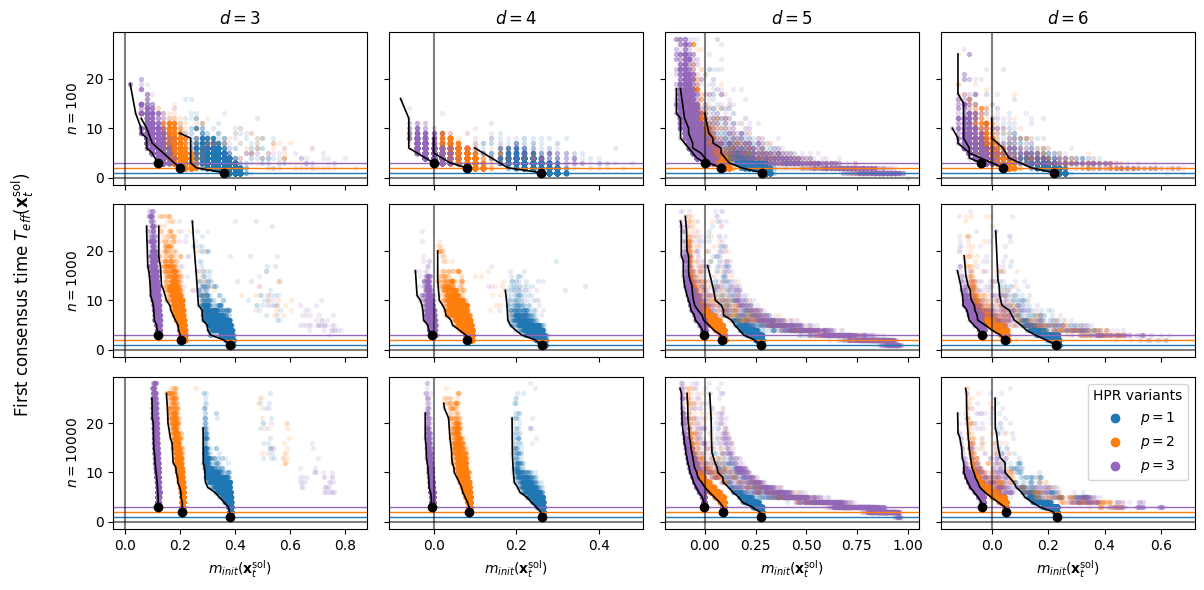

In [12]:
import matplotlib.pyplot as plt
import numpy as np

color = ['tab:blue', 'tab:orange', 'tab:purple']
ds = [3, 4, 5, 6]          # now columns
ns = [100, 1000, 10000] # now rows

fig, axes = plt.subplots(
    len(ns), len(ds),
    figsize=(9/3*len(ds), 6),
    sharex='col',
    sharey=True
)

for i, n in enumerate(ns):      # rows = n
    for j, d in enumerate(ds):  # cols = d
        ax = axes[i, j]

        # collect points by algorithm p
        points = {1: [], 2: [], 3: []}
        
        for k in range(3):
            ax.axhline(k + 1, color=color[k], lw=1)
        ax.axhline(0, color='black', alpha=0.5)

        for row in df.itertuples():
            if row.d != d or row.n != n:
                continue
            mask = row.first_consensus != -1
            x = np.array(row.initial_mag)[mask]
            y = np.array(row.first_consensus)[mask]
            p = row.T
            points[p].append(np.column_stack((x, y)))

        # scatter and plot decreasing envelope
        for p in [1, 2, 3]:
            if not points[p]:
                continue
            pts = np.vstack(points[p])
            pts = pts[np.argsort(pts[:, 0])]  # sort by m_init

            ax.scatter(pts[:, 0], pts[:, 1],
                       color=color[p - 1], alpha=0.1, s=8)

            # make descending envelope
            env_x, env_y = [pts[0, 0]], [pts[0, 1]]
            current_min = pts[0, 1]
            for x_val, y_val in pts[1:]:
                if y_val < current_min and y_val >= p:
                    env_x.append(x_val)
                    env_y.append(y_val)
                    current_min = y_val

            ax.plot(env_x, env_y, color='black', lw=1.2)
            ax.scatter(env_x[-1], env_y[-1], color='black',zorder=10,marker='o')

        # reference lines
        ax.axvline(0, color='black', alpha=0.5)
        

# Labels
for n, ax in zip(ns, axes[:, 0]):
    ax.set_ylabel(f'$n={n}$')

for d, ax in zip(ds, axes[0, :]):
    ax.set_title(f"$d={d}$")

for ax in axes[-1, :]:
    ax.set_xlabel(r'$m_{init}(\mathbf{x}^{\mathrm{sol}}_t)$')

# Legend
for k in range(3):
    axes[-1, -1].scatter([], [], color=color[k], label=f"$p={k+1}$")
axes[-1, -1].legend(title='HPR variants')

fig.supylabel(r'First consensus time $T_{eff}(\mathbf{x}^{\mathrm{sol}}_t)$', x=-0.0)
plt.tight_layout()
plt.savefig(FIGURE_DIR / 'hpr_first_consensus_time_vs_init_mag_sol_t_d=3456.png', dpi=600, bbox_inches='tight')
plt.show()


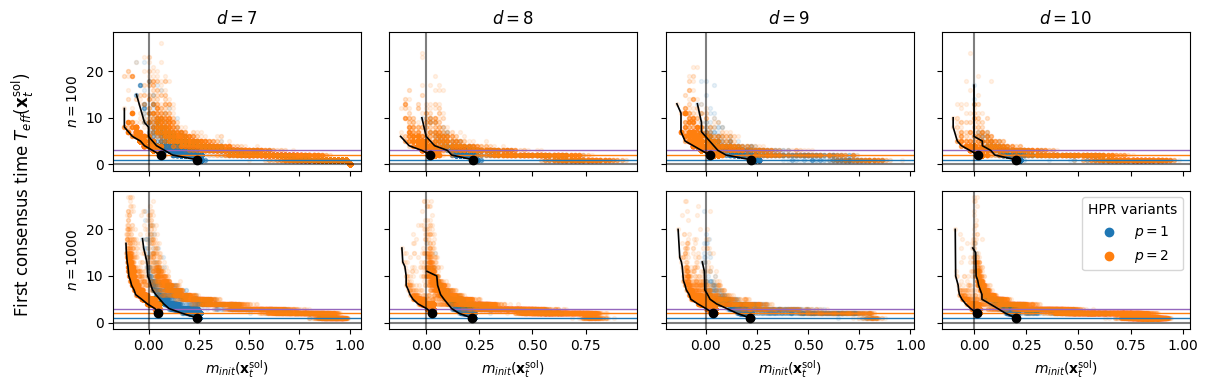

In [13]:
import matplotlib.pyplot as plt
import numpy as np

color = ['tab:blue', 'tab:orange', 'tab:purple']
ds = [7,8,9,10]          # now columns
ns = [100, 1000] # now rows

fig, axes = plt.subplots(
    len(ns), len(ds),
    figsize=(9/3*len(ds), 4),
    sharex='col',
    sharey=True
)

for i, n in enumerate(ns):      # rows = n
    for j, d in enumerate(ds):  # cols = d
        ax = axes[i, j]

        # collect points by algorithm p
        points = {1: [], 2: [], 3: []}
        
        for k in range(3):
            ax.axhline(k + 1, color=color[k], lw=1)
        ax.axhline(0, color='black', alpha=0.5)

        for row in df.itertuples():
            if row.d != d or row.n != n:
                continue
            mask = row.first_consensus != -1
            x = np.array(row.initial_mag)[mask]
            y = np.array(row.first_consensus)[mask]
            p = row.T
            points[p].append(np.column_stack((x, y)))

        # scatter and plot decreasing envelope
        for p in [1, 2]:
            if not points[p]:
                continue
            pts = np.vstack(points[p])
            pts = pts[np.argsort(pts[:, 0])]  # sort by m_init

            ax.scatter(pts[:, 0], pts[:, 1],
                       color=color[p - 1], alpha=0.1, s=8)

            # make descending envelope
            env_x, env_y = [pts[0, 0]], [pts[0, 1]]
            current_min = pts[0, 1]
            for x_val, y_val in pts[1:]:
                if y_val < current_min and y_val >= p:
                    env_x.append(x_val)
                    env_y.append(y_val)
                    current_min = y_val

            ax.plot(env_x, env_y, color='black', lw=1.2)
            ax.scatter(env_x[-1], env_y[-1], color='black',zorder=10,marker='o')

        # reference lines
        ax.axvline(0, color='black', alpha=0.5)
        

# Labels
for n, ax in zip(ns, axes[:, 0]):
    ax.set_ylabel(f'$n={n}$')

for d, ax in zip(ds, axes[0, :]):
    ax.set_title(f"$d={d}$")

for ax in axes[-1, :]:
    ax.set_xlabel(r'$m_{init}(\mathbf{x}^{\mathrm{sol}}_t)$')

# Legend
for k in range(2):
    axes[-1, -1].scatter([], [], color=color[k], label=f"$p={k+1}$")
axes[-1, -1].legend(title='HPR variants')

fig.supylabel(r'First consensus time $T_{eff}(\mathbf{x}^{\mathrm{sol}}_t)$', x=-0.0)
plt.tight_layout()
plt.savefig(FIGURE_DIR / 'hpr_first_consensus_time_vs_init_mag_sol_t_d=789.png', dpi=600, bbox_inches='tight')


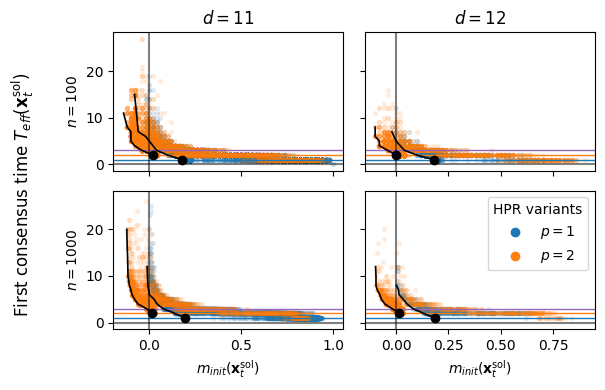

In [14]:
import matplotlib.pyplot as plt
import numpy as np

color = ['tab:blue', 'tab:orange', 'tab:purple']
ds = [11,12]          # now columns
ns = [100, 1000] # now rows

fig, axes = plt.subplots(
    len(ns), len(ds),
    figsize=(9/3*len(ds), 4),
    sharex='col',
    sharey=True
)

for i, n in enumerate(ns):      # rows = n
    for j, d in enumerate(ds):  # cols = d
        ax = axes[i, j]

        # collect points by algorithm p
        points = {1: [], 2: [], 3: []}
        
        for k in range(3):
            ax.axhline(k + 1, color=color[k], lw=1)
        ax.axhline(0, color='black', alpha=0.5)

        for row in df.itertuples():
            if row.d != d or row.n != n:
                continue
            mask = row.first_consensus != -1
            x = np.array(row.initial_mag)[mask]
            y = np.array(row.first_consensus)[mask]
            p = row.T
            points[p].append(np.column_stack((x, y)))

        # scatter and plot decreasing envelope
        for p in [1, 2]:
            if not points[p]:
                continue
            pts = np.vstack(points[p])
            pts = pts[np.argsort(pts[:, 0])]  # sort by m_init

            ax.scatter(pts[:, 0], pts[:, 1],
                       color=color[p - 1], alpha=0.1, s=8)

            # make descending envelope
            env_x, env_y = [pts[0, 0]], [pts[0, 1]]
            current_min = pts[0, 1]
            for x_val, y_val in pts[1:]:
                if y_val < current_min and y_val >= p:
                    env_x.append(x_val)
                    env_y.append(y_val)
                    current_min = y_val

            ax.plot(env_x, env_y, color='black', lw=1.2)
            ax.scatter(env_x[-1], env_y[-1], color='black',zorder=10,marker='o')

        # reference lines
        ax.axvline(0, color='black', alpha=0.5)
        

# Labels
for n, ax in zip(ns, axes[:, 0]):
    ax.set_ylabel(f'$n={n}$')

for d, ax in zip(ds, axes[0, :]):
    ax.set_title(f"$d={d}$")

for ax in axes[-1, :]:
    ax.set_xlabel(r'$m_{init}(\mathbf{x}^{\mathrm{sol}}_t)$')

# Legend
for k in range(2):
    axes[-1, -1].scatter([], [], color=color[k], label=f"$p={k+1}$")
axes[-1, -1].legend(title='HPR variants')

fig.supylabel(r'First consensus time $T_{eff}(\mathbf{x}^{\mathrm{sol}}_t)$', x=-0.0)
plt.tight_layout()
plt.savefig(FIGURE_DIR / 'hpr_first_consensus_time_vs_init_mag_sol_t_d=1112.png', dpi=600,  bbox_inches='tight')


## Table for hyperparameters in Appendix

In [15]:
df = pd.read_csv("parameters/HPR_hyperparameters.csv").set_index(["d","p","n"]).sort_index()[['bias','damp','temp']].reset_index()
df.n = df.n.apply(lambda x: f'${x}$')
df.p = df.p.apply(lambda x: f'${x}$')
df.d = df.d.apply(lambda x: f'${x}$')
df.bias = df.bias.apply(lambda x: f'${x:.2f}$')
df.damp = df.damp.apply(lambda x: f'${x:.2f}$')
df.temp = df.temp.apply(lambda x: f'${x}$')
df.columns = [r'$d$',r'$p$',r'$n$',r'bias $\pi$', r'dampening $\varepsilon$', r'temp $\lambda_{\mathrm{init}}$']
df.set_index([r'$d$',r'$p$',r'$n$']).to_latex(TABLE_DIR / 'hpr_hyperparameters.tex', escape=False)